# **`pycoco`** and **`CoCo`** 'recon' files

___

## Introduction

**`CoCo`** generates as an output, a series of files in `$COCO_ROOT_DIR/recon/`. In this notebook, we will interact with the reconstructed light curve file, the `$SNNAME.dat` and the `$SNNAME.stat` file.

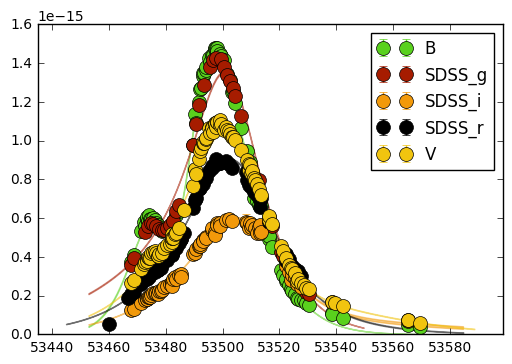

In [2]:
import sys
import numpy as np
import matplotlib.pyplot as plt

def col(i):
    colour = {0 : "#59D11D", 1 : "#A61C00", 2 : "#F2990A", \
              3 : "#000000", 4 : "#f1c40f", 5 : "#e67e22", \
              6 : "#e74c3c", 7 : "#1abc9c"}
    return colour[i % 8]

reconfile = '/Users/berto/Code/CoCo/recon/SN2005bf.dat'
lcfile = '/Users/berto/Code/verbose-enigma/testdata/lc/SN2005bf.dat'

RECON = np.loadtxt(reconfile, unpack=True, dtype=[('MJD', 'float'), ('Flux', 'float'), ('Error', 'float'), ('Filter', 'S10')])
LC = np.loadtxt(lcfile, unpack=True, dtype=[('MJD', 'float'), ('Flux', 'float'), ('Error', 'float'), ('Filter', 'S10')])
FLT = np.unique(LC[3])

for i in range(FLT.size):
    idx = np.where(LC[3] == FLT[i])
    plt.errorbar(LC[0][idx], LC[1][idx], yerr=LC[2][idx], markersize=10, fmt='o', color=col(i), label=FLT[i].decode())

    idx = np.where(RECON[3] == FLT[i])
    plt.fill_between(RECON[0][idx], RECON[1][idx] + RECON[2][idx], RECON[1][idx] - RECON[2][idx], color=col(i), alpha=0.5)


plt.xlim(RECON[0].min() - 10, RECON[0].max() + 10)
plt.legend()
plt.show()

In [3]:
from __future__ import print_function ## Force python3-like printing

%matplotlib inline
from matplotlib import pyplot as plt

import os
import numpy as np
from astropy.table import Table

import pycoco as pcc

reload(pcc) ## FOR DEV

<module 'pycoco' from '/Users/berto/Code/verbose-enigma/pycoco/__init__.pyc'>

In [4]:
L = pcc.LCfitClass()

In [5]:
L.recon_directory

'/Users/berto/Code/CoCo/recon'

In [6]:
# recon_filename = os.path.abspath(os.path.join(L.recon_directory, 'SN2005bf.dat'))
recon_filename = os.path.abspath(os.path.join(L.recon_directory, 'SN2011dh.dat'))

print(recon_filename)
L.load_formatted_phot(recon_filename)
L.unpack()

/Users/berto/Code/CoCo/recon/SN2011dh.dat


In [7]:
L.data

OrderedDict([('B', <Table length=132>
                MJD            flux          ...       flux_upper             flux_lower      
                 d    erg / (Angstrom cm2 s) ... erg / (Angstrom cm2 s) erg / (Angstrom cm2 s)
              float64        float64         ...        float64                float64        
              ------- ---------------------- ... ---------------------- ----------------------
              55701.0            4.61725e-18 ...            5.62086e-18            3.61364e-18
              55702.0            7.60128e-18 ...            9.13829e-18            6.06427e-18
              55703.0            1.24954e-17 ...           1.483261e-17           1.015819e-17
              55704.0            2.05013e-17 ...           2.402485e-17           1.697775e-17
              55705.0            3.35533e-17 ...           3.880971e-17           2.829689e-17
              55706.0            5.47363e-17 ...           6.247637e-17           4.699623e-17
            

In [8]:
L.data_filters

OrderedDict([('B', <pycoco.FilterClass instance at 0x10f71ee60>),
             ('I', <pycoco.FilterClass instance at 0x10f71ed40>),
             ('R', <pycoco.FilterClass instance at 0x10f7857a0>),
             ('SDSS_g', <pycoco.FilterClass instance at 0x10f732cf8>),
             ('SDSS_i', <pycoco.FilterClass instance at 0x10f6a28c0>),
             ('SDSS_r', <pycoco.FilterClass instance at 0x10f747128>),
             ('SDSS_z', <pycoco.FilterClass instance at 0x10f6f9b90>),
             ('V', <pycoco.FilterClass instance at 0x10f68f5f0>)])

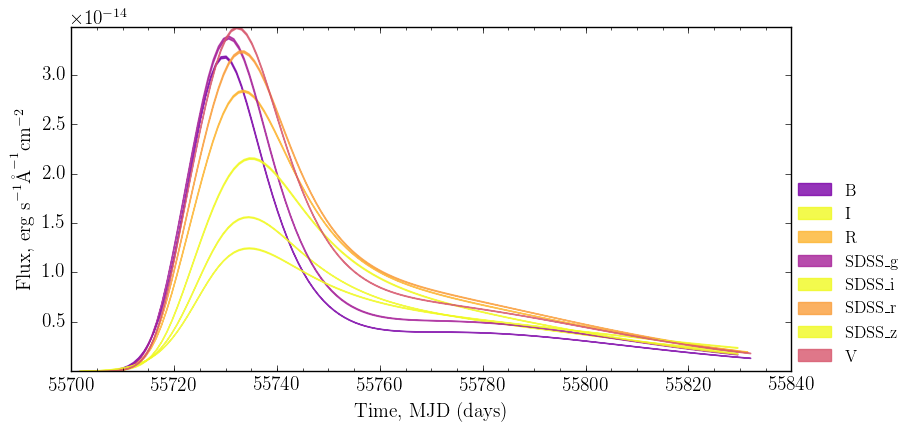

In [9]:
L.plot()

In [12]:
recon_spec_path = '/Users/berto/Code/CoCo/recon/SN2011dh_no_iz_55715.000000.spec'
S = pcc.specfitClass()
S.load(filename = recon_spec_path)

You didn't supply a directory, so using self.data_directory
Reading /Users/berto/Code/CoCo/recon/SN2011dh_no_iz_55715.000000.spec


{'_meta': OrderedDict([('filename', '/Users/berto/Code/CoCo/recon/SN2011dh_no_iz_55715.000000.spec')]), '_masked': False, '_copy_indices': True, '_column_class': <class 'astropy.table.column.Column'>, 'formatter': <astropy.table.pprint.TableFormatter object at 0x110d6c990>, '_init_indices': True, 'columns': <TableColumns names=('wavelength','flux','flux_err')>, 'primary_key': None}


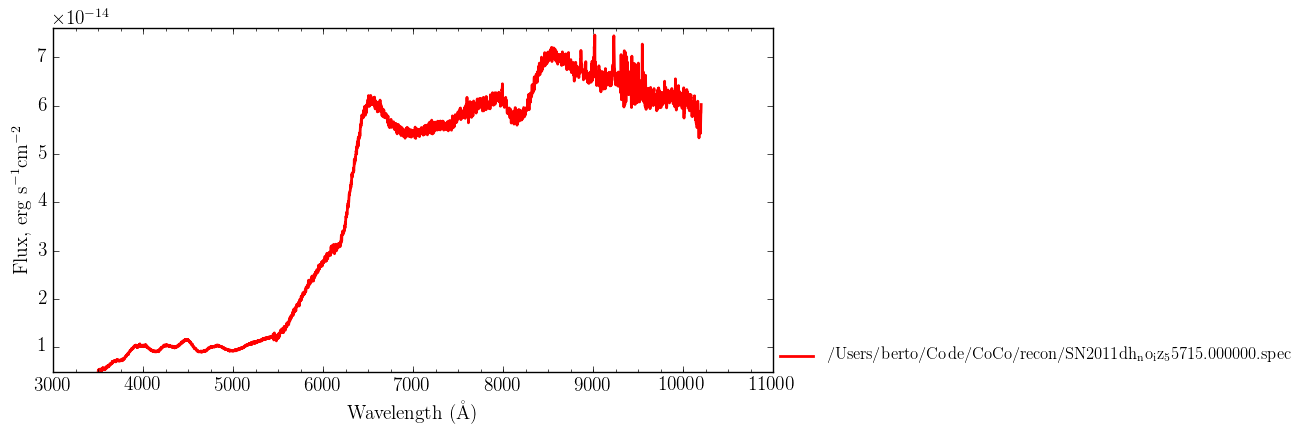

In [13]:
S.plot()